In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random

In [195]:
num_size = 100
shape = [num_size, num_size]
intf_lvl = 0 #interference level
sat_lim = 1 #saturation level
decay_rate = 0.1 # decay_rate
N_patterns = 8 # number of pattern in one sequence
N_trial = 1000 # number of trials
dt = 1

In [3]:
def int2pattern(index):
    return [1 if int(x)>0 else -1 for x in bin(index).lstrip('0b').zfill(num_size+2)[2:]]
def pattern2int(pattern):
    return int("".join(str(x) for x in pattern[0]),2)

In [4]:
# generate one pattern, one number, [0,0,...,1,0,...0]
def gen_one_pattern():
    #index = np.random.randint(np.power(2,num_size))
    # pattern = np.zeros(num_size)
    # pattern[index] = 1
    #pattern = int2pattern(index)
    index = 0
    pattern=np.random.randint(0,2,size=num_size)*2-1
    return pattern, index

In [175]:
def update_W(W, pattern, n_patterns,time, isdecay=True, isintference=True, issat=True, sat_lim=sat_lim):
    if isdecay:
        W = (1-decay_rate)*W
    if isintference:
        W = (1-intf_lvl)*W
    pattern = np.asarray([pattern]).reshape([1, num_size])
    if issat:
        #W =( W*(n_patterns) + (sat_lim*np.ones_like(W) - np.abs(W))/sat_lim*(pattern.T).dot(pattern))/(n_patterns+1)
        W = W + (sat_lim*np.ones_like(W) - np.abs(W))/sat_lim*(pattern.T).dot(pattern)
    else:
        #W =( W*(n_patterns) + (pattern.T).dot(pattern))/(n_patterns+1)
        W = W+((pattern.T).dot(pattern))
    W = np.asarray([[min(max(W[ii,jj],-1), 1) for ii in range(num_size)] for jj in range(num_size)])
    diag_idx = np.diag_indices(num_size)
    W[diag_idx] = 0
    return W

In [6]:
# accuracy
theta = 0.6
def accuracy(W, Patterns):
    n_pattern = len(Patterns)
    acc = np.zeros(len(Patterns))
    Patterns_pre =[]
    index_pre = []
    
    for kk in range(len(Patterns)):
        pattern = Patterns[kk]
        pattern = np.asarray([pattern]).reshape([1, num_size])
        pattern_temp = (pattern).dot(W.T)
        #theta = pattern[0].T.dot(pattern[0])/n_pattern
        #print(theta)
        theta=0
        pattern_pre = np.asarray([[1 if x>= theta else -1 for x in pattern_temp[0]]])
        Patterns_pre.append(pattern_pre)
        #index_pre.append(pattern2int(pattern_pre))
        index_pre.append(0)
        #acc[kk] = 1 - np.sum(np.abs(np.asarray(pattern_pre)-np.asarray(pattern))) /num_size/2
        if np.sum(np.abs(np.asarray(pattern_pre)-np.asarray(pattern))) == 0:
            acc[kk] = 1
    return acc, Patterns_pre, index_pre

In [145]:
#N_patterns = 6 # number of pattern in one sequence
def STM_trial(isdecay=True, isintference=True, issat=True, sat_lim = sat_lim):
    Patterns = []
    Indexs = []
    Delta_W = np.zeros(shape=shape)
    W = np.zeros(shape=shape)
    for kk in range(N_patterns):
        pattern, index = gen_one_pattern() # generate new pattern
        n_patterns = len(Patterns)
        time = dt*n_patterns
        W = update_W(W, pattern, n_patterns,time, isdecay, isintference, issat, sat_lim) # memory new pattern, update W
        
        Patterns.append(pattern)
        Indexs.append(index)
    acc, Patterns_pre, index_pre = accuracy(W, Patterns)
    return Patterns, Indexs, acc, Patterns_pre, index_pre, W

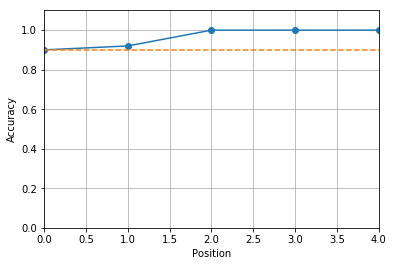

In [171]:
# N_trial = 1000 # number of trials
N_patterns = 5
N_trial = 100
sat_lim = 1
accs = np.zeros(N_patterns)
for _ in range(N_trial):
    Patterns, Indexs, acc, Patterns_pre, index_pre, W = STM_trial(isdecay=False, isintference=False, issat=False)
    accs = accs + acc

f1 = plt.figure()
plt.plot(accs/N_trial, marker = 'o')
plt.plot(0.9*np.ones(N_patterns), '--')
plt.xlim([0, N_patterns-1])
plt.ylim([0,1.1])
plt.ylabel("Accuracy")
plt.xlabel("Position")
plt.grid()
plt.show(f1)

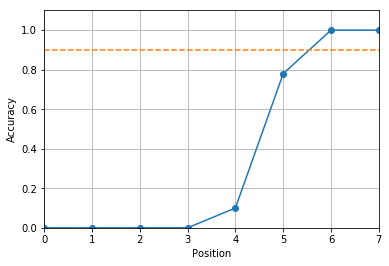

In [202]:
# N_trial = 1000 # number of trials
N_patterns = 8
N_trial = 100
sat_lim = 1
accs = np.zeros(N_patterns)
for _ in range(N_trial):
    Patterns, Indexs, acc, Patterns_pre, index_pre, W = STM_trial(isdecay=False, isintference=False, issat=False)
    accs = accs + acc

f1 = plt.figure()
plt.plot(accs/N_trial, marker = 'o')
plt.plot(0.9*np.ones(N_patterns), '--')
plt.xlim([0, N_patterns-1])
plt.ylim([0,1.1])
plt.ylabel("Accuracy")
plt.xlabel("Position")
plt.grid()
plt.show(f1)

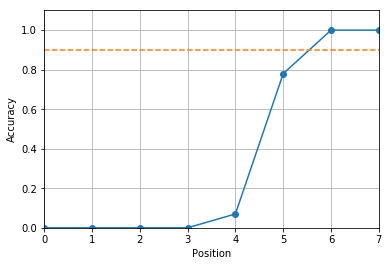

In [203]:
#N_trial = 1000 # number of trials
N_patterns = 8
N_trial = 100
accs = np.zeros(N_patterns)
for _ in range(N_trial):
    Patterns, Indexs, acc, Patterns_pre, index_pre, W = STM_trial(isdecay=True, isintference=False, issat=False)
    accs = accs + acc

f1 = plt.figure()
plt.plot(accs/N_trial, marker = 'o')
plt.plot(0.9*np.ones(N_patterns), '--')
plt.xlim([0, N_patterns-1])
plt.ylim([0,1.1])
plt.ylabel("Accuracy")
plt.xlabel("Position")
plt.grid()
plt.show(f1)

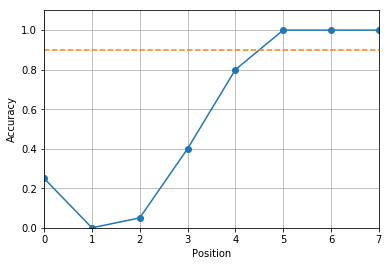

In [204]:
#N_trial = 1000 # number of trials
N_patterns = 8
N_trial = 100
accs = np.zeros(N_patterns)
for _ in range(N_trial):
    Patterns, Indexs, acc, Patterns_pre, index_pre, W = STM_trial(isdecay=True, isintference=False, issat=True)
    accs = accs + acc

f1 = plt.figure()
plt.plot(accs/N_trial, marker = 'o')
plt.plot(0.9*np.ones(N_patterns), '--')
plt.xlim([0, N_patterns-1])
plt.ylim([0,1.1])
plt.ylabel("Accuracy")
plt.xlabel("Position")
plt.grid()
plt.show(f1)

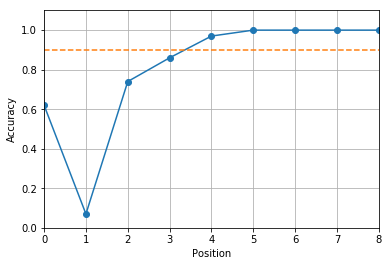

In [138]:
#N_trial = 1000 # number of trials
N_patterns = 9
N_trial = 100
accs = np.zeros(N_patterns)
for _ in range(N_trial):
    Patterns, Indexs, acc, Patterns_pre, index_pre, W = STM_trial(isdecay=True, isintference=True, issat=True)
    accs = accs + acc

f1 = plt.figure()
plt.plot(accs/N_trial, marker = 'o')
plt.plot(0.9*np.ones(N_patterns), '--')
plt.xlim([0, N_patterns-1])
plt.ylim([0,1.1])
plt.ylabel("Accuracy")
plt.xlabel("Position")
plt.grid()
plt.show(f1)

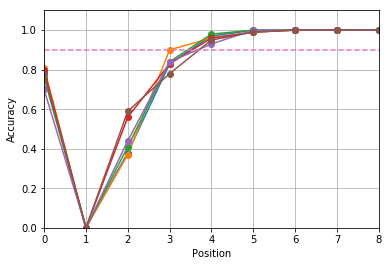

In [148]:
sat_lims = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5]
#N_trial = 1000 # number of trials
N_patterns = 9
N_trial = 100
f1 = plt.figure()
for sat_lim in sat_lims:
    accs = np.zeros(N_patterns)
    for _ in range(N_trial):
        Patterns, Indexs, acc, Patterns_pre, index_pre, W = STM_trial(isdecay=True, isintference=True, issat=True, sat_lim=https://en.wikipedia.org/wiki/Hopfield_networksat_lim)
        accs = accs + acc
    plt.plot(accs/N_trial, marker = 'o')
plt.plot(0.9*np.ones(N_patterns), '--')
plt.xlim([0, N_patterns-1])
plt.ylim([0,1.1])
plt.ylabel("Accuracy")
plt.xlabel("Position")
plt.grid()
plt.show(f1)

In [140]:
accs[1]/N_trial

0.01

In [14]:
Patterns, Indexs, acc, Patterns_pre, index_pre, W = STM_trial(isdecay=True, isintference=True, issat=True)

In [15]:
W

array([[ 0.      ,  0.205675, -0.205675,  0.735225,  0.205675, -0.205675,
        -0.735225, -0.735225,  0.205675,  0.735225,  0.205675, -0.205675,
        -0.735225,  0.205675, -0.205675,  0.735225,  0.735225,  0.735225,
        -0.735225, -0.205675],
       [ 0.205675,  0.      , -0.735225,  0.205675,  0.735225, -0.735225,
        -0.205675, -0.205675,  0.735225,  0.205675,  0.735225, -0.735225,
        -0.205675,  0.735225, -0.735225,  0.205675,  0.205675,  0.205675,
        -0.205675, -0.735225],
       [-0.205675, -0.735225,  0.      , -0.205675, -0.735225,  0.735225,
         0.205675,  0.205675, -0.735225, -0.205675, -0.735225,  0.735225,
         0.205675, -0.735225,  0.735225, -0.205675, -0.205675, -0.205675,
         0.205675,  0.735225],
       [ 0.735225,  0.205675, -0.205675,  0.      ,  0.205675, -0.205675,
        -0.735225, -0.735225,  0.205675,  0.735225,  0.205675, -0.205675,
        -0.735225,  0.205675, -0.205675,  0.735225,  0.735225,  0.735225,
        -0.735225, 